In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(-1,1,100)

def stepFunction(x):
    y = np.ones(len(x)); y[x>0] = -1
    return y

def poly(x):
    y = x**2 + x**4
    return y

y = stepFunction(x)

In [3]:
def sinusoidal(x, args=[1]*6):
    return args[0]*np.cos(args[1]*x + args[2]) + args[3]*np.sin(args[4]*x + args[5])

def predict(weights):
    return np.sum([sinusoidal(x, args=w) for w in weights], axis=0)

def loss(y, y_pred):
    return sum((y-y_pred)**4)

def loss_grad(y_true, weights, i,j, h=0.001):
    loss_current = loss(y_true, predict(weights))
    weights[i,j] += h
    y_alt = predict(weights)
    return (loss(y_true, y_alt) - loss_current)/h, loss_current

def updateWeights_single(weights, nsteps = 10,lr=0.1, h=0.01, verbose=True, lr_random=True):
    losses = []
    for n in range(nsteps): 
        for i, wi in enumerate(weights):
            for j, _ in enumerate(wi):

                dL_dwij, loss_current = loss_grad(y, weights, i,j, h=h)
                if lr_random: lr = np.random.exponential(scale=0.001)
                weights[i,j] -= dL_dwij*lr
        losses.append(loss_current)
        if verbose and (n%(nsteps//10)==0): print(f'{n}: {loss_current}')
    return weights, losses

def updateWeights(weights, nsteps = 10,lr=0.1, h=0.01, verbose=True, lr_random=True,
                 max_weights = 5):
    losses = []
    grads = []
    best_weights = weights.copy()
    best_weights_num = 0
    for n in range(nsteps):
        
        # coarse
        #weights_dict = {0 : {'weights' : weights, 'loss': loss(y_true, predict(weights))}}
        #min_loss_arg = lambda : np.argmin([weights_dict[i]['loss'] for i in weights_dict.keys()])
        #if n < 10:
        #    weights = np.random.rand()
        #    weights_dict[n+1] = {'weights' : weights, 'loss': loss(y_true, predict(weights))}
            
            

        grad = np.zeros(weights.shape)
        for i, wi in enumerate(weights):
            for j, _ in enumerate(wi):

                dL_dwij, loss_current = loss_grad(y, weights, i,j, h=h)
                grad[i,j] = dL_dwij
        

        #if lr_random: lr = np.random.exponential(scale=lr)
        lr_ = ((n+1)**.5*lr)
        weights -= grad*lr_

        losses.append(loss_current)
        if loss_current == min(losses):
            best_weights = weights.copy()
            best_weights_num = n
        grads.append(np.linalg.norm(grad))    
        
        if abs((loss_current - np.mean(losses[-10:]))/np.mean(losses[-10:])) <0.000001 and n>5:
            print(n, 'added weight')
            new_weights = weights.copy(); new_weights[1,4] 
            weights = np.vstack([weights, np.random.rand(len(weights[0]))])
        if loss_current > 10**15: break
        if verbose and (n%(nsteps//10)==0): print(f'{n}: {loss_current}')
        
        if len(weights) >= max_weights: break
    print('done!')
    return best_weights, losses, grads, best_weights_num


$$
\frac{\partial L}{\partial \omega_{i,j}} = 4\\
\Rightarrow
\omega_{i,j} = \omega_{i,j}-  \text{learning rate} \times -\frac{\partial L}{\partial \omega_{i,j}}
$$

In [190]:

weights = np.random.randn(1,6)
#weights, losses = updateWeights_single(weights, nsteps=100, lr=0.001, h=0.001, verbose=True)
best_weights, losses, grads, best_weights_num = updateWeights(weights, nsteps=3000, lr=0.000001, h=0.001, verbose=True, lr_random=False)
y_pred_auto = predict(best_weights)




0: 288.87742638975135
300: 29.024440506545325
600: 20.71519788489413
900: 14.863950008726807
1200: 12.606682207329984
1500: 11.018333437284179
1800: 10.331393394622532
2100: 9.202846382370396
2400: 8.364402705081533
2700: 8.755715883049847
2970 added weight
done!


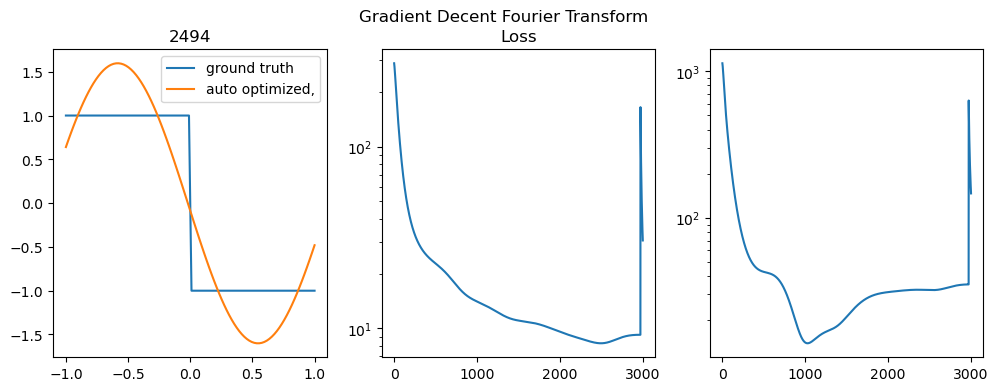

In [191]:
fig, ax = plt.subplots(1,3,figsize=(12,4))
ax[0].plot(x,y, label='ground truth')


ax[0].plot(x,y_pred_auto, label = f'auto optimized,')
ax[0].legend(loc='upper right')
fig.suptitle('Gradient Decent Fourier Transform');
ax[1].set_title('Loss');
ax[0].set_title(best_weights_num);

ax[1].set(yscale='log')

ax[2].plot(grads)
ax[2].set(yscale='log')
#ax[2].plot([100/(n+1)**.4-1*n**.3 for n in range(len(grads))])
ax[1].plot(losses)

weights

In [180]:
best_weights

array([[1.15835346, 1.58433276, 2.86268151, 0.06570904, 3.23777375,
        1.95872741],
       [1.20031193, 2.42785341, 2.6841721 , 1.17728577, 2.92718004,
        2.15320908],
       [0.44183641, 1.13362213, 0.70657027, 0.86811114, 1.04896382,
        1.26156397]])

In [85]:
x = np.random.exponential(scale=.1,size=100000)
plt.hist(x, bins=100)

plt.ylabel('frequency')
plt.xlabel('lr');
plt.close()

# DFT

In [66]:
x = np.linspace(-1,1,100)

def stepFunction(x):
    y = np.ones(len(x)); y[x>0] = -1
    return y

def poly(x):
    y = x**2 + x**4
    return y

y = stepFunction(x)

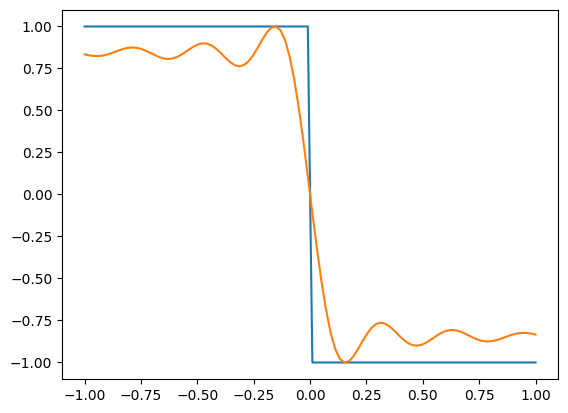

In [97]:
omegas = np.linspace(0,20,100)

plt.plot(x,y)


coefs = []
for omega in omegas:
    c = np.exp(1j*2*omega*x)
    cy = c*np.array([np.complex128(i) for i in y])
    #plt.plot(x,c.real*np.sign(sum(cy).real), lw=sum(cy).real)
    #plt.plot(x,c.imag*np.sign(sum(cy).imag), lw=sum(cy).imag)
    #print(sum(cy))
    coefs.append(sum(cy))


# reconstruct
out = np.zeros(len(y))
for omega, coef in zip(omegas, coefs):
    out += coef.real*np.cos(omega*x)
    out += coef.imag*np.sin(omega*x)


scale = max(out)*1.1
plt.plot(x,out/scale)

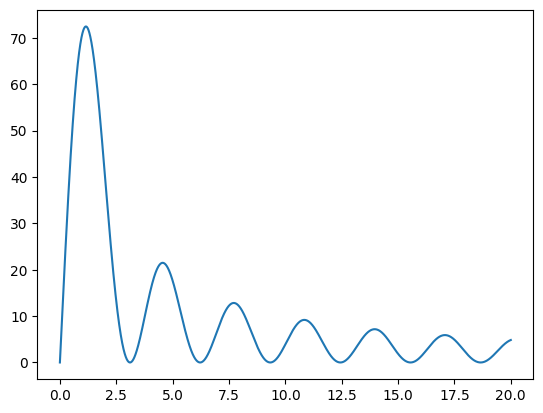

In [95]:
plt.plot(omegas, np.abs(coefs))

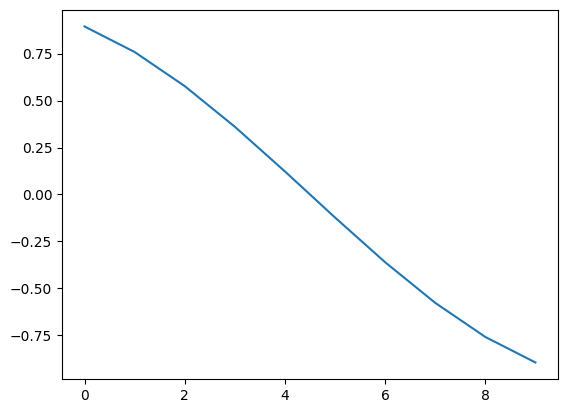

In [62]:
plt.plot(np.sin(coefs[0].imag*x))

# FFT